# **MUSK**

In [118]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [119]:
cd 'drive/My Drive/Colab Notebooks/musk'

[Errno 2] No such file or directory: 'drive/My Drive/Colab Notebooks/musk'
/content/drive/My Drive/Colab Notebooks/musk


## Importing libraries

In [0]:
import numpy as np
import pandas as pd
import altair as alt
import matplotlib.pyplot as plt
import seaborn as sns

Altair has a limit of 5000 observation to plot. We are setting it to 10000. 

In [0]:
from altair import pipe, limit_rows, to_values
t = lambda data: pipe(data, limit_rows(max_rows=10000), to_values)
alt.data_transformers.register('custom', t)
alt.data_transformers.enable('custom')

DataTransformerRegistry.enable('custom')

## Importing dataset

In [0]:
data = pd.read_csv('musk_csv.csv')

In [0]:
data.shape

(6598, 170)

In [0]:
data.head()

,ID,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,...,f128,f129,f130,f131,f132,f133,f134,f135,f136,f137,f138,f139,f140,f141,f142,f143,f144,f145,f146,f147,f148,f149,f150,f151,f152,f153,f154,f155,f156,f157,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,1,MUSK-211,211_1+1,46,-108,-60,-69,-117,49,38,-161,-8,5,-323,-220,-113,-299,-283,-307,-31,-106,-227,-42,-59,-22,-67,189,81,17,-27,-89,-67,105,-116,124,-106,5,-120,63,-165,...,81,-114,-187,45,-118,-75,-182,-234,-19,12,-13,-41,-119,-149,70,17,-20,-177,-101,-116,-14,-50,24,-81,-125,-114,-44,128,3,-244,-308,52,-7,39,126,156,-50,-112,96,1
1,2,MUSK-211,211_1+10,41,-188,-145,22,-117,-6,57,-171,-39,-100,-319,-111,-228,-281,-281,-300,54,-149,-98,-196,-27,-22,2,75,49,-34,45,-91,32,95,-116,85,-23,42,-58,61,-171,...,88,-21,-32,32,-128,-72,-124,-218,-94,53,-79,-20,-35,-26,4,50,17,-177,-102,-121,-66,-77,51,-41,-34,-32,-63,115,-5,-235,-59,-2,52,103,136,169,-61,-136,79,1
2,3,MUSK-211,211_1+11,46,-194,-145,28,-117,73,57,-168,-39,-22,-319,-111,-104,-283,-282,-303,52,-152,-97,-225,-28,-22,2,179,49,-33,46,-88,22,79,-116,19,-11,6,-38,71,-175,...,64,0,-23,-15,-129,-74,-125,-221,-93,53,-72,-19,-33,-26,3,49,17,-177,-102,-119,-66,-81,51,-41,-27,-41,-140,77,-163,-238,-134,-154,57,143,142,165,-67,-145,39,1
3,4,MUSK-211,211_1+12,41,-188,-145,22,-117,-7,57,-170,-39,-99,-319,-111,-228,-282,-281,-301,54,-150,-98,-196,-28,-22,2,77,48,-34,46,-91,32,94,-116,84,-23,41,-58,62,-171,...,88,-20,-32,32,-128,-73,-125,-220,-93,53,-78,-19,-34,-26,4,50,17,-177,-101,-121,-65,-77,52,-41,-34,-32,-66,115,-7,-236,-60,-4,52,104,136,168,-60,-135,80,1
4,5,MUSK-211,211_1+13,41,-188,-145,22,-117,-7,57,-170,-39,-99,-319,-111,-228,-282,-281,-301,54,-150,-98,-196,-28,-22,2,78,48,-34,46,-91,31,94,-116,84,-23,41,-58,62,-171,...,88,-20,-32,32,-128,-73,-125,-220,-93,53,-78,-19,-34,-26,4,50,17,-177,-101,-121,-65,-76,52,-41,-34,-32,-66,115,-8,-236,-60,-4,52,104,137,168,-60,-135,80,1


In [0]:
data.tail()

,ID,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,...,f128,f129,f130,f131,f132,f133,f134,f135,f136,f137,f138,f139,f140,f141,f142,f143,f144,f145,f146,f147,f148,f149,f150,f151,f152,f153,f154,f155,f156,f157,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
6593,6594,NON-MUSK-jp13,jp13_2+5,51,-123,-23,-108,-117,134,-160,82,-230,-28,-150,-63,-55,-77,-108,-308,-221,-41,-57,12,-112,-183,-198,-35,137,-198,-168,-153,-51,252,-108,135,-121,119,-120,73,28,...,224,-18,-96,43,1,-76,-53,-38,-23,-176,-32,-205,-95,-124,-139,-153,-170,-178,-102,-113,-42,-67,-141,-96,-112,-113,-47,124,-12,62,-66,164,-14,-29,107,171,-44,-115,118,0
6594,6595,NON-MUSK-jp13,jp13_2+6,44,-104,-19,-105,-117,142,-165,68,-225,-32,-124,-77,-43,-74,-100,-291,-215,-25,-49,6,-121,-183,-201,-54,127,-204,-164,-160,-41,255,-117,-104,-14,133,-157,141,46,...,232,-6,-146,-88,-75,-74,-55,-30,-28,-175,-48,-202,-86,-125,-138,-154,-169,-178,-102,-123,-32,-52,-136,-98,-109,-112,-56,-49,-85,60,-51,166,-9,150,129,158,-66,-144,-5,0
6595,6596,NON-MUSK-jp13,jp13_2+7,44,-102,-19,-104,-117,72,-165,65,-219,-12,-107,-66,-58,-82,-77,-288,-214,-21,-58,-32,-93,-183,-197,-71,218,-217,-164,-161,-59,243,-117,-103,-14,118,-157,140,-150,...,167,-13,-188,-89,-117,-57,-47,-33,-28,-175,-50,-216,-129,-130,-138,-155,-169,-178,-102,-124,-32,-51,-136,-98,-123,-112,-55,-47,-84,-226,90,117,-8,150,130,159,-66,-144,-6,0
6596,6597,NON-MUSK-jp13,jp13_2+8,51,-121,-23,-106,-117,63,-161,79,-224,-30,-129,-54,-60,-86,-88,-307,-221,-39,-58,-12,-86,-184,-180,-61,221,-211,-168,-154,-63,243,-107,136,-121,116,-122,73,-155,...,167,7,-170,43,-6,-61,-47,-43,-23,-176,-33,-212,-131,-113,-139,-153,-170,-178,-103,-114,-42,-66,-141,-96,-123,-113,-46,124,-11,-238,86,99,-14,-31,106,171,-44,-116,117,0
6597,6598,NON-MUSK-jp13,jp13_2+9,51,-122,-23,-106,-117,190,-161,80,-227,-52,-139,-63,-51,-79,-99,-122,-220,-35,-57,6,-104,-183,-196,-51,63,-204,-169,-154,63,128,-108,135,-121,42,-122,73,-90,...,98,-57,-152,43,-4,-69,-51,-37,-23,-175,-33,-209,-108,-125,-139,-153,-170,-178,-102,-115,-42,-66,-141,-96,-110,-113,-46,124,-11,95,40,124,-14,-30,107,171,-44,-115,118,0


In [0]:
data.isnull().values.any()

False

So there are no NaN values in the dataset.

In [0]:
print('Number Of Unique Conformation Names: ', data['conformation_name'].nunique())
print('Number of Unique Molecule Names: ', data['molecule_name'].nunique())

Number Of Unique Conformation Names:  6598
Number of Unique Molecule Names:  102


In [0]:
alt.Chart(data).mark_bar().encode(
    x= alt.X('class:N', title = 'Classes'),
    y= 'count()',
    color='class:N'
).configure_axis(
    grid = False,
    labelFontSize = 16,
    titleFontSize = 16
).configure_title(
    fontSize = 240
).properties(
    height=450,
    width=450
)

Output hidden; open in https://colab.research.google.com to view.

In [0]:
data['class'].value_counts()

0    5581
1    1017
Name: class, dtype: int64

We have 1017 values of MUSK and 5581 vlaues of NON-MUSK.

## **Preprocessing data set**

## Splitting data into Dependent and Independent variables

Independent variable are those variable which are not dependent on any one like in this dataset 'f1' to 'f166'.


Dependent variable are those variable which are calculated with the use of independent variable. In this dataset 'class' column is dependent variable which we have to predict using the features.

In [0]:
X = data.iloc[:, 3:169]
y = data.iloc[:, 169]

In [0]:
X.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,...,f127,f128,f129,f130,f131,f132,f133,f134,f135,f136,f137,f138,f139,f140,f141,f142,f143,f144,f145,f146,f147,f148,f149,f150,f151,f152,f153,f154,f155,f156,f157,f158,f159,f160,f161,f162,f163,f164,f165,f166
0,46,-108,-60,-69,-117,49,38,-161,-8,5,-323,-220,-113,-299,-283,-307,-31,-106,-227,-42,-59,-22,-67,189,81,17,-27,-89,-67,105,-116,124,-106,5,-120,63,-165,40,-27,68,...,-27,81,-114,-187,45,-118,-75,-182,-234,-19,12,-13,-41,-119,-149,70,17,-20,-177,-101,-116,-14,-50,24,-81,-125,-114,-44,128,3,-244,-308,52,-7,39,126,156,-50,-112,96
1,41,-188,-145,22,-117,-6,57,-171,-39,-100,-319,-111,-228,-281,-281,-300,54,-149,-98,-196,-27,-22,2,75,49,-34,45,-91,32,95,-116,85,-23,42,-58,61,-171,2,-144,38,...,17,88,-21,-32,32,-128,-72,-124,-218,-94,53,-79,-20,-35,-26,4,50,17,-177,-102,-121,-66,-77,51,-41,-34,-32,-63,115,-5,-235,-59,-2,52,103,136,169,-61,-136,79
2,46,-194,-145,28,-117,73,57,-168,-39,-22,-319,-111,-104,-283,-282,-303,52,-152,-97,-225,-28,-22,2,179,49,-33,46,-88,22,79,-116,19,-11,6,-38,71,-175,3,-129,37,...,41,64,0,-23,-15,-129,-74,-125,-221,-93,53,-72,-19,-33,-26,3,49,17,-177,-102,-119,-66,-81,51,-41,-27,-41,-140,77,-163,-238,-134,-154,57,143,142,165,-67,-145,39
3,41,-188,-145,22,-117,-7,57,-170,-39,-99,-319,-111,-228,-282,-281,-301,54,-150,-98,-196,-28,-22,2,77,48,-34,46,-91,32,94,-116,84,-23,41,-58,62,-171,3,-144,38,...,17,88,-20,-32,32,-128,-73,-125,-220,-93,53,-78,-19,-34,-26,4,50,17,-177,-101,-121,-65,-77,52,-41,-34,-32,-66,115,-7,-236,-60,-4,52,104,136,168,-60,-135,80
4,41,-188,-145,22,-117,-7,57,-170,-39,-99,-319,-111,-228,-282,-281,-301,54,-150,-98,-196,-28,-22,2,78,48,-34,46,-91,31,94,-116,84,-23,41,-58,62,-171,3,-144,38,...,17,88,-20,-32,32,-128,-73,-125,-220,-93,53,-78,-19,-34,-26,4,50,17,-177,-101,-121,-65,-76,52,-41,-34,-32,-66,115,-8,-236,-60,-4,52,104,137,168,-60,-135,80


In [0]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: class, dtype: int64

## Feature Scaling

Input variables may have different units that, in turn, may mean the variables have different scales.
Differences in the scales across input variables may increase the difficulty of the problem being modeled. An example of this is that large input values can result in a model that learns large weight values. A model with large weight values is often unstable, meaning that it may suffer from poor performance during learning and sensitivity to input values resulting in higher generalization error. So we need to put aur dataset in same scale

In [0]:
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
X = s.fit_transform(X)

In [0]:
X = pd.DataFrame(X)
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165
0,-0.243124,0.122552,0.193471,-0.849986,-0.209163,0.380210,0.451914,-1.761086,0.720127,0.686645,-1.869032,-1.698248,-0.831529,-1.690639,-1.632572,-0.584766,0.191214,-0.623122,-2.117010,0.036605,0.221408,0.331532,-0.056930,0.944609,0.450655,0.855319,-0.127043,0.185244,-1.189679,0.733253,-0.419919,0.924441,-1.236700,0.709993,-0.621155,-0.926701,-0.472295,0.558210,0.688773,0.684873,...,0.227609,0.769364,-0.656029,-0.938255,0.692847,-0.964859,0.0679,-1.339647,-1.583232,0.150171,0.20942,0.317104,0.282748,-1.041717,-1.205785,0.854851,0.151039,0.017015,-0.208033,-0.266463,-0.134443,0.071754,-0.116621,0.183083,-0.432211,-0.902679,-0.876454,0.426917,0.962296,0.658318,-0.394537,-1.142753,0.999563,0.273558,-0.253997,0.191712,-0.768792,-0.045613,0.503332,0.576245
1,-0.337030,-0.758442,-1.057429,0.281313,-0.209163,-0.302278,0.616692,-1.871747,0.433934,-0.770000,-1.832302,-0.327788,-2.703285,-1.512744,-1.612164,-0.485675,0.916292,-1.323466,-0.553321,-1.905425,0.647040,0.331532,0.673093,0.020222,0.154626,0.351953,0.658860,0.158134,0.369868,0.653936,-0.419919,0.558656,0.198974,1.023042,0.201725,-0.961748,-0.529615,0.114939,-0.970118,0.313328,...,0.738888,0.822963,0.672330,0.641873,0.478426,-1.083469,0.1165,-0.487882,-1.399844,-1.066184,0.62783,-0.533693,0.504393,0.263858,0.574518,0.053919,0.469146,0.375868,-0.208033,-0.286004,-0.367414,-0.753072,-0.482183,0.507338,0.233396,0.382934,0.337767,0.179852,0.830322,0.576301,-0.287016,1.166837,0.577198,1.119768,0.380582,0.329019,-0.550386,-0.245376,0.187598,0.395603
2,-0.243124,-0.824517,-1.057429,0.355904,-0.209163,0.678023,0.616692,-1.838549,0.433934,0.312079,-1.832302,-0.327788,-0.685043,-1.532511,-1.622368,-0.528143,0.899231,-1.372327,-0.541200,-2.271132,0.633739,0.331532,0.673093,0.863522,0.154626,0.361823,0.669775,0.198799,0.212338,0.527029,-0.419919,-0.060366,0.406541,0.718454,0.467170,-0.786512,-0.567829,0.126604,-0.757439,0.300943,...,1.017768,0.639192,0.972281,0.733623,-0.296788,-1.095330,0.0841,-0.502567,-1.434229,-1.049966,0.62783,-0.443457,0.514947,0.294944,0.574518,0.041784,0.459506,0.375868,-0.208033,-0.286004,-0.274226,-0.753072,-0.536341,0.507338,0.233396,0.481827,0.204498,-0.821411,0.444551,-1.043548,-0.322856,0.471177,-0.611680,1.191480,0.777193,0.411403,-0.617588,-0.354338,0.069197,-0.029436
3,-0.337030,-0.758442,-1.057429,0.281313,-0.209163,-0.314686,0.616692,-1.860681,0.433934,-0.756127,-1.832302,-0.327788,-2.703285,-1.522628,-1.612164,-0.499831,0.916292,-1.339753,-0.553321,-1.905425,0.633739,0.331532,0.673093,0.036440,0.145376,0.351953,0.669775,0.158134,0.369868,0.646004,-0.419919,0.549276,0.198974,1.014581,0.201725,-0.944225,-0.529615,0.126604,-0.970118,0.313328,...,0.738888,0.822963,0.686613,0.641873,0.478426,-1.083469,0.1003,-0.502567,-1.422767,-1.049966,0.62783,-0.520802,0.514947,0.279401,0.574518,0.053919,0.469146,0.375868,-0.208033,-0.266463,-0.367414,-0.737210,-0.482183,0.519347,0.233396,0.382934,0.337767,0.140842,0.830322,0.555796,-0.298963,1.157562,0.561555,1.119768,0.390497,0.329019,-0.567187,-0.227216,0.200753,0.406229
4,-0.337030,-0.758442,-1.057429,0.281313,-0.209163,-0.314686,0.616692,-1.860681,0.433934,-0.756127,-1.832302,-0.327788,-2.703285,-1.522628,-1.612164,-0.499831,0.916292,-1.339753,-0.553321,-1.905425,0.633739,0.331532,0.673093,0.044548,0.145376,0.351953,0.669775,0.158134,0.354115,0.646004,-0.419919,0.549276,0.198974,1.014581,0.201725,-0.944225,-0.529615,0.126604,-0.970118,0.313328,...,0.738888,0.822963,0.686613,0.641873,0.478426,-1.083469,0.1003,-0.502567,-1.422767,-1.049966,0.62783,-0.520802,0.514947,0.279401,0.574518,0.053919,0.469146,0.375868,-0.208033,-0.266463,-0.367414,-0.737210,-0.468644,0.519347,0.233396,0.382934,0.337767,0.140842,0.830322,0.545544,-0.298963,1.157562,0.561555,

## Reducing the dimensions of dataset 

Why we are doing dimension reduction?
Because there are 166 variable which is a large amount. So are  going to use most important features from these 166 variables. Which also decrease the dimension of our input and our model can perform better on it.
Let's Assume out of these 166 variable 40 variable are importance of 95% and 126 variable have 5%. So we can run our model on those 40 variable and leave rest of 126 variable.
By this we can reduce the complication and increase the performance and reduce the time.

In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components = None)
X = pca.fit_transform(X) 

In [0]:
explained_variance = pca.explained_variance_ratio_

In [0]:
total = 0
for i in range(0, 36): 
    total = total + explained_variance[i] 
total*100

94.39014352784268

Our 35 variable are of 94.39% importance. So we are going to take these and leave rest.

In [0]:
pca = PCA(n_components = 35)
X = pca.fit_transform(X)

In [0]:
X = pd.DataFrame(X)
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34
0,1.217220,9.430927,-2.062257,-1.184650,0.757179,-0.638689,2.620163,0.358560,1.163271,0.686511,1.125461,-2.199764,-0.805291,1.864541,0.647327,-2.370936,-0.509595,-0.526768,-1.097292,-1.075202,-0.320587,-0.209517,0.789582,-0.028542,-1.472390,-0.184934,0.680391,0.009845,-0.135705,-0.208391,0.634305,0.040817,0.447415,-0.206687,-0.178783
1,-3.282384,8.142049,-1.017107,1.234692,1.467643,-2.379760,0.394205,-0.438189,-2.677313,-0.928178,0.824159,-0.324684,1.780269,-2.049233,-1.969766,-2.543816,-1.355888,0.666307,-1.815718,0.977388,0.703819,1.068134,-0.280308,0.001218,0.708506,-0.530856,-0.402790,-0.269271,0.447082,0.070484,-0.147021,0.025333,-0.165016,0.798085,-0.243407
2,-3.404298,7.778997,1.738737,0.958769,0.261536,-1.135050,0.039323,-0.401263,-3.004638,-1.281694,0.004469,-0.612882,0.818558,-2.135333,-1.053789,-2.564999,-0.440562,0.013359,-1.727456,0.159405,1.154846,-0.697134,-0.274723,-0.117949,0.502845,-0.278385,-0.339337,0.122630,-0.181095,0.344112,-0.335061,-0.246375,-0.621409,0.803747,-0.688681
3,-3.286574,8.170463,-0.993374,1.204384,1.458181,-2.351271,0.419158,-0.435498,-2.669983,-0.912321,0.812675,-0.347523,1.781648,-2.083604,-1.941888,-2.539637,-1.374750,0.657778,-1.804787,0.978471,0.723111,1.045023,-0.312458,0.015378,0.702989,-0.526033,-0.416407,-0.264375,0.444813,0.093142,-0.148323,0.020793,-0.186805,0.782766,-0.243174
4,-3.284805,8.172113,-0.991083,1.203382,1.453184,-2.350220,0.422887,-0.431434,-2.669417,-0.907893,0.814633,-0.346052,1.779650,-2.082689,-1.941857,-2.538219,-1.375726,0.660656,-1.807416,0.977308,0.725858,1.044255,-0.317882,0.015817,0.703892,-0.527687,-0.416231,-0.263454,0.442138,0.097034,-0.149800,0.023797,-0.187141,0.782554,-0.241354


## **Modelling**

I am going to use ANN because  CNN is used on image recognition, RNN is used to make prediction on preceeding dependent data which are no use of here.
Keras is one of the best library to build Neural Net. So I am going to use it.

In [0]:
from tensorflow import keras
from keras import backend as k
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras import Sequential

Using TensorFlow backend.


Input dim = 35 because we have 35 input variables.
I am using relu activation because it will provide much better accuracy to the model as it block the neuron to go below zero.
I am using adam opitimizer which is the best optimizer for classification problem.
I am using loss= binary crossentropy because the output is binary.

In [0]:
classifier = Sequential()
classifier.add(Dense(units = 32, kernel_initializer = 'uniform', 
                     activation = 'relu', input_dim = 35))
classifier.add(Dense(units = 29, kernel_initializer = 'uniform', 
                     activation = 'relu'))
classifier.add(Dense(units = 22, kernel_initializer = 'uniform', 
                     activation = 'relu'))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform',
                     activation = 'sigmoid'))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy',
                   metrics = ['accuracy',keras.metrics.Precision(),keras.metrics.Recall()])

In [0]:
model = classifier.fit(X, y, batch_size = 15, nb_epoch = 10, validation_split=0.2)

Train on 5278 samples, validate on 1320 samples
Epoch 1/10
5278/5278 [==============================] - 1s 159us/sample - loss: 0.0401 - acc: 0.9900 - val_loss: 0.0234 - val_acc: 0.9939
Epoch 2/10
5278/5278 [==============================] - 1s 132us/sample - loss: 0.0077 - acc: 0.9977 - val_loss: 0.0336 - val_acc: 0.9894
Epoch 3/10
5278/5278 [==============================] - 1s 134us/sample - loss: 0.0023 - acc: 0.9996 - val_loss: 0.0250 - val_acc: 0.9909
Epoch 4/10
5278/5278 [==============================] - 1s 132us/sample - loss: 5.8053e-04 - acc: 1.0000 - val_loss: 0.0158 - val_acc: 0.9947
Epoch 5/10
5278/5278 [==============================] - 1s 139us/sample - loss: 0.0016 - acc: 0.9992 - val_loss: 0.0110 - val_acc: 0.9970
Epoch 6/10
5278/5278 [==============================] - 1s 133us/sample - loss: 0.0123 - acc: 0.9949 - val_loss: 0.0231 - val_acc: 0.9917
Epoch 7/10
5278/5278 [==============================] - 1s 127us/sample - loss: 0.0034 - acc: 0.9983 - val_loss: 0.0649 

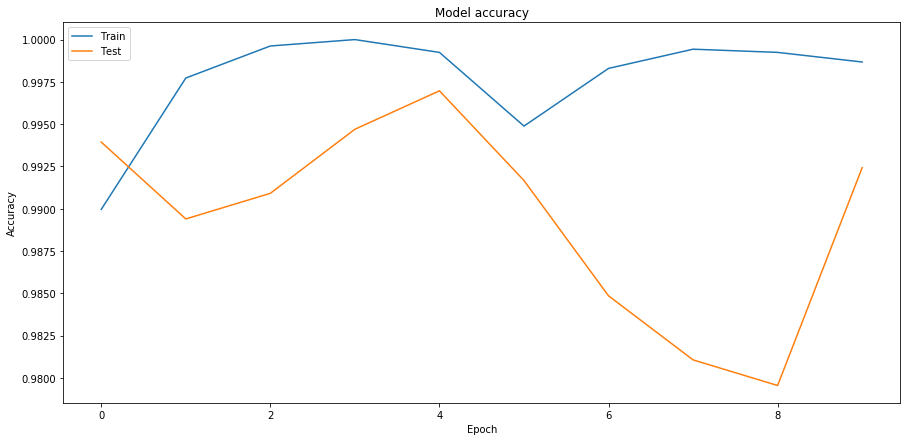

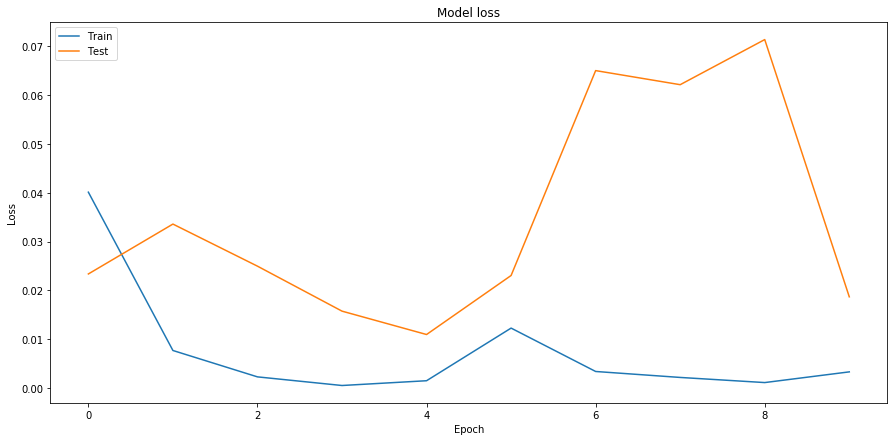

In [0]:
plt.figure(figsize=(15,7))
plt.plot(model.history['acc'])
plt.plot(model.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
plt.figure(figsize=(15,7))
plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [0]:
precision = np.mean(model.history['precision_2'])
recall = np.mean(model.history['recall_2'])
F1_score = 2*((precision*recall)/(precision+recall+k.epsilon()))

In [0]:
print('Precision is: ',precision)
print('Recall is: ',recall)
print('F1 Score is: ',F1_score)

Precision is:  0.99251395
Recall is:  0.99601775
F1 Score is:  0.9942627085028942


We have got a F1 Score of 0.9942627085028942 which is a good score.

# Saving and Loading Model

In [0]:
model.model.save('model2.h5')
model = load_model('model2.h5')

## Splitting data into Training and Testing

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [121]:
X_train.shape

(5278, 35)

In [122]:
X_test.shape

(1320, 35)

In [0]:
classifier = Sequential()
classifier.add(Dense(units = 32, kernel_initializer = 'uniform', 
                     activation = 'relu', input_dim = 35))
classifier.add(Dense(units = 29, kernel_initializer = 'uniform', 
                     activation = 'relu'))
classifier.add(Dense(units = 22, kernel_initializer = 'uniform', 
                     activation = 'relu'))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform',
                     activation = 'sigmoid'))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy',
                   metrics = ['accuracy',keras.metrics.Precision(),keras.metrics.Recall()])

In [145]:
# Building
classifier.fit(X_train, y_train, batch_size = 15, nb_epoch = 10)

Train on 5278 samples
Epoch 1/10
5278/5278 [==============================] - 1s 128us/sample - loss: 0.0103 - acc: 0.9964 - precision_4: 0.9854 - recall_4: 0.9914
Epoch 2/10
5278/5278 [==============================] - 1s 130us/sample - loss: 0.0113 - acc: 0.9970 - precision_4: 0.9890 - recall_4: 0.9914
Epoch 3/10
5278/5278 [==============================] - 1s 124us/sample - loss: 0.0064 - acc: 0.9985 - precision_4: 0.9927 - recall_4: 0.9976
Epoch 4/10
5278/5278 [==============================] - 1s 129us/sample - loss: 0.0047 - acc: 0.9994 - precision_4: 0.9963 - recall_4: 1.0000
Epoch 5/10
5278/5278 [==============================] - 1s 125us/sample - loss: 0.0042 - acc: 0.9994 - precision_4: 0.9963 - recall_4: 1.0000
Epoch 6/10
5278/5278 [==============================] - 1s 124us/sample - loss: 0.0040 - acc: 0.9994 - precision_4: 0.9963 - recall_4: 1.0000
Epoch 7/10
5278/5278 [==============================] - 1s 124us/sample - loss: 0.0040 - acc: 0.9994 - precision_4: 0.9963 - r

## Predicting Results

In [0]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = np.where(y_pred > 0.5, 1, 0)

In [147]:
y_pred

array([[0],
       [1],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [0]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [149]:
cm

array([[1115,    5],
       [   8,  192]])

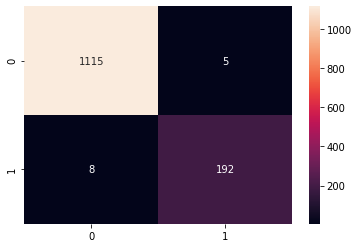

In [150]:
sns.heatmap(cm,annot=True,fmt="d")

In [151]:
acc = sum(cm.diagonal())/cm.sum()
acc*100

99.01515151515152